<a href="https://colab.research.google.com/github/MOJASEEM/primetrade/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set visualization defaults
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [5]:
# Load sentiment data
df_sentiment = pd.read_csv('/fear_greed_index.csv')
print("\n SENTIMENT DATASET")
print(f"Shape: {df_sentiment.shape}")
print(f"\nFirst 5 rows:\n{df_sentiment.head()}")
print(f"\nData types:\n{df_sentiment.dtypes}")
print(f"\nMissing values:\n{df_sentiment.isnull().sum()}")
print(f"\nBasic statistics:\n{df_sentiment.describe()}")


 SENTIMENT DATASET
Shape: (2644, 4)

First 5 rows:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Data types:
timestamp          int64
value              int64
classification    object
date              object
dtype: object

Missing values:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Basic statistics:
          timestamp        value
count  2.644000e+03  2644.000000
mean   1.631899e+09    46.981089
std    6.597967e+07    21.827680
min    1.517463e+09     5.000000
25%    1.574811e+09    28.000000
50%    1.631900e+09    46.000000
75%    1.688989e+09    66.000000
max    1.746164e+09    95.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [15]:
# Load trader data
df_trades = pd.read_csv('/historical_data.csv')
print("\n TRADER DATASET")
print(f"Shape: {df_trades.shape}")
print(f"\nFirst 5 rows:\n{df_trades.head()}")
print(f"\nData types:\n{df_trades.dtypes}")
print(f"\nMissing values:\n{df_trades.isnull().sum()}")
print(f"\nBasic statistics:\n{df_trades.describe()}")


 TRADER DATASET
Shape: (211224, 16)

First 5 rows:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Tran

In [8]:
# Convert date to datetime
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

print(f"\n Sentiment Distribution:")
sentiment_dist = df_sentiment['classification'].value_counts()
print(sentiment_dist)
print(f"\nPercentage:")
print(df_sentiment['classification'].value_counts(normalize=True) * 100)

print(f"\n Date Range:")
print(f"From: {df_sentiment['date'].min()}")
print(f"To: {df_sentiment['date'].max()}")
print(f"Total Days: {(df_sentiment['date'].max() - df_sentiment['date'].min()).days}")



 Sentiment Distribution:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

Percentage:
classification
Fear             29.538578
Greed            23.940998
Extreme Fear     19.213313
Neutral          14.977307
Extreme Greed    12.329803
Name: proportion, dtype: float64

 Date Range:
From: 2018-02-01 00:00:00
To: 2025-05-02 00:00:00
Total Days: 2647


In [9]:
# Create simplified sentiment (Fear/Greed)
df_sentiment['sentiment_binary'] = df_sentiment['classification'].apply(
    lambda x: 'Greed' if 'Greed' in x else 'Extreme Greed' if 'Extreme Greed' in x else 'Fear'
)
df_sentiment['is_greed'] = (df_sentiment['sentiment_binary'].isin(['Greed', 'Extreme Greed'])).astype(int)

print(f"\n Simplified Sentiment:")
print(df_sentiment['sentiment_binary'].value_counts())


 Simplified Sentiment:
sentiment_binary
Fear     1685
Greed     959
Name: count, dtype: int64



 Saved: sentiment_analysis.png


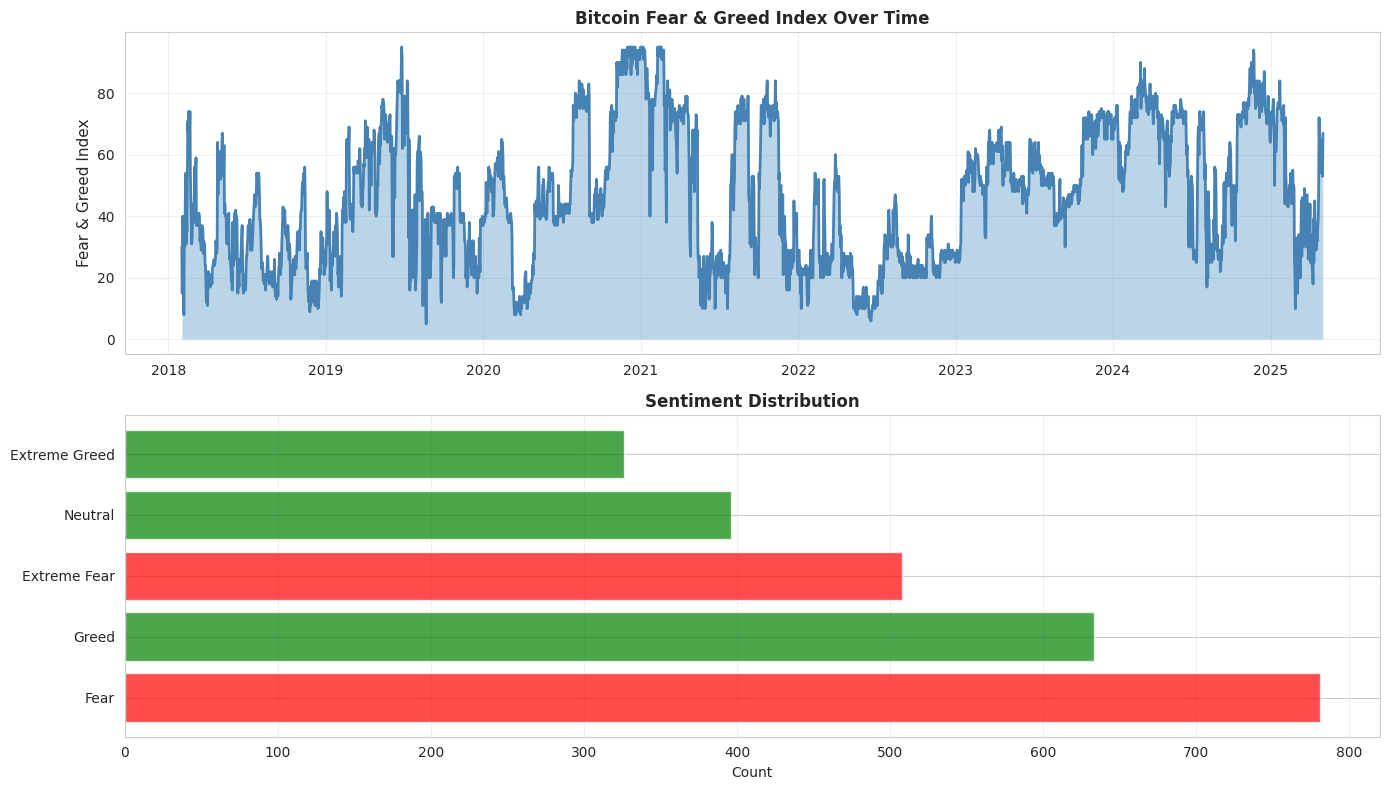

In [12]:
# Visualize sentiment
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Timeline
axes[0].plot(df_sentiment['date'], df_sentiment['value'], linewidth=2, color='steelblue')
axes[0].fill_between(df_sentiment['date'], df_sentiment['value'], alpha=0.3)
axes[0].set_ylabel('Fear & Greed Index', fontsize=11)
axes[0].set_title('Bitcoin Fear & Greed Index Over Time', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Distribution
sentiment_counts = df_sentiment['classification'].value_counts()
colors_sent = ['red' if 'Fear' in x else 'green' for x in sentiment_counts.index]
axes[1].barh(range(len(sentiment_counts)), sentiment_counts.values, color=colors_sent, alpha=0.7)
axes[1].set_yticks(range(len(sentiment_counts)))
axes[1].set_yticklabels(sentiment_counts.index)
axes[1].set_xlabel('Count')
axes[1].set_title('Sentiment Distribution', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('/content/outputs/sentiment_analysis.png', dpi=300, bbox_inches='tight')
print("\n Saved: sentiment_analysis.png")
plt.show()


In [13]:
df_sentiment.to_csv('/content/needed/sentiment_processed.csv', index=False)
print(" Saved: sentiment_processed.csv")

 Saved: sentiment_processed.csv


In [16]:
# Parse timestamp
df_trades['Timestamp IST'] = pd.to_datetime(df_trades['Timestamp IST'],
                                             format='%d-%m-%Y %H:%M',
                                             errors='coerce')

# Extract date
df_trades['date'] = df_trades['Timestamp IST'].dt.date
df_trades['year'] = df_trades['Timestamp IST'].dt.year
df_trades['month'] = df_trades['Timestamp IST'].dt.month
df_trades['day'] = df_trades['Timestamp IST'].dt.day
df_trades['hour'] = df_trades['Timestamp IST'].dt.hour
df_trades['dayofweek'] = df_trades['Timestamp IST'].dt.day_name()

# Convert to datetime date for merging
df_trades['date'] = pd.to_datetime(df_trades['date'])

In [17]:
 # Ensure numeric columns
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']
for col in numeric_cols:
    df_trades[col] = pd.to_numeric(df_trades[col], errors='coerce')

print("Data types converted")
print(f"Date range: {df_trades['Timestamp IST'].min()} to {df_trades['Timestamp IST'].max()}")


Data types converted
Date range: 2023-05-01 01:06:00 to 2025-05-01 12:13:00


In [18]:
# Trade profitability
df_trades['is_profitable'] = (df_trades['Closed PnL'] > 0).astype(int)
df_trades['pnl_per_token'] = df_trades['Closed PnL'] / (df_trades['Size Tokens'] + 0.001)
df_trades['pnl_roi'] = (df_trades['Closed PnL'] / (df_trades['Size USD'] + 0.001)) * 100
df_trades['fee_impact'] = (df_trades['Fee'] / (df_trades['Size USD'] + 0.001)) * 100

# Position info
df_trades['side_numeric'] = (df_trades['Side'] == 'BUY').astype(int)


In [19]:
trader_metrics = df_trades.groupby('Account').agg({
    'Closed PnL': ['sum', 'mean', 'std', 'min', 'max', 'count'],
    'is_profitable': 'mean',
    'Size USD': ['mean', 'sum'],
    'Fee': ['sum', 'mean'],
    'Coin': 'nunique',
    'Side': lambda x: (x == 'BUY').mean()
}).round(4)

In [20]:
trader_metrics.columns = [
    'total_pnl', 'avg_pnl', 'pnl_std', 'min_pnl', 'max_pnl', 'trade_count',
    'win_rate', 'avg_size_usd', 'total_volume_usd', 'total_fees', 'avg_fee',
    'coin_count', 'buy_rate'
]


In [21]:
trader_metrics['profitability'] = (trader_metrics['total_pnl'] /
                                   (trader_metrics['total_volume_usd'] + 0.001)) * 100

trader_metrics = trader_metrics.sort_values('total_pnl', ascending=False)


In [22]:
print(f"\n Top 10 Traders by Total PnL:")
print(trader_metrics[['total_pnl', 'win_rate', 'trade_count']].head(10))

print(f"\n Trader Metrics Summary:")
print(trader_metrics[['total_pnl', 'win_rate', 'trade_count']].describe())


 Top 10 Traders by Total PnL:
                                               total_pnl  win_rate  \
Account                                                              
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2.143383e+06    0.3371   
0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06    0.3596   
0xbaaaf6571ab7d571043ff1e313a9609a10637864  9.401638e+05    0.4676   
0x513b8629fe877bb581bf244e326a047b249c4ff1  8.404226e+05    0.4012   
0xbee1707d6b44d4d52bfe19e41f8a828645437aab  8.360806e+05    0.4282   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  6.777471e+05    0.4862   
0x72743ae2822edd658c0c50608fd7c5c501b2afbd  4.293556e+05    0.3459   
0x430f09841d65beb3f27765503d0f850b8bce7713  4.165419e+05    0.4842   
0x72c6a4624e1dffa724e6d00d64ceae698af892a0  4.030115e+05    0.3063   
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  3.790954e+05    0.8109   

                                            trade_count  
Account                                                  
0xb1231a4a2d

In [23]:
trader_metrics.to_csv('/content/needed/trader_metrics.csv')
print("\n Saved: trader_metrics.csv")


 Saved: trader_metrics.csv


In [24]:
daily_metrics = df_trades.groupby('date').agg({
    'Closed PnL': ['sum', 'mean', 'count'],
    'is_profitable': 'mean',
    'Size USD': ['mean', 'sum'],
    'Fee': 'sum',
    'Account': 'nunique'
}).round(4)

daily_metrics.columns = [
    'daily_total_pnl', 'daily_avg_pnl', 'trade_count',
    'win_rate', 'avg_size_usd', 'total_volume', 'total_fees', 'active_traders'
]

In [25]:
daily_metrics = daily_metrics.reset_index()

print(f"\n Daily Metrics Sample:")
print(daily_metrics.head(10))


 Daily Metrics Sample:
        date  daily_total_pnl  daily_avg_pnl  trade_count  win_rate  \
0 2023-05-01           0.0000         0.0000            3    0.0000   
1 2023-12-05           0.0000         0.0000            9    0.0000   
2 2023-12-14        -205.4347       -18.6759           11    0.3636   
3 2023-12-15         -24.6320       -12.3160            2    0.0000   
4 2023-12-16           0.0000         0.0000            3    0.0000   
5 2023-12-17         304.9828        21.7845           14    0.5000   
6 2023-12-18           0.0000         0.0000            2    0.0000   
7 2023-12-19        1000.5386        66.7026           15    0.6667   
8 2023-12-20         162.7323         9.0407           18    0.4444   
9 2023-12-21         537.2114        10.9635           49    0.5306   

   avg_size_usd  total_volume  total_fees  active_traders  
0      159.0000        477.00      0.0000               1  
1     5556.2033      50005.83     12.5015               1  
2    10291.213


 Saved: daily_metrics.png


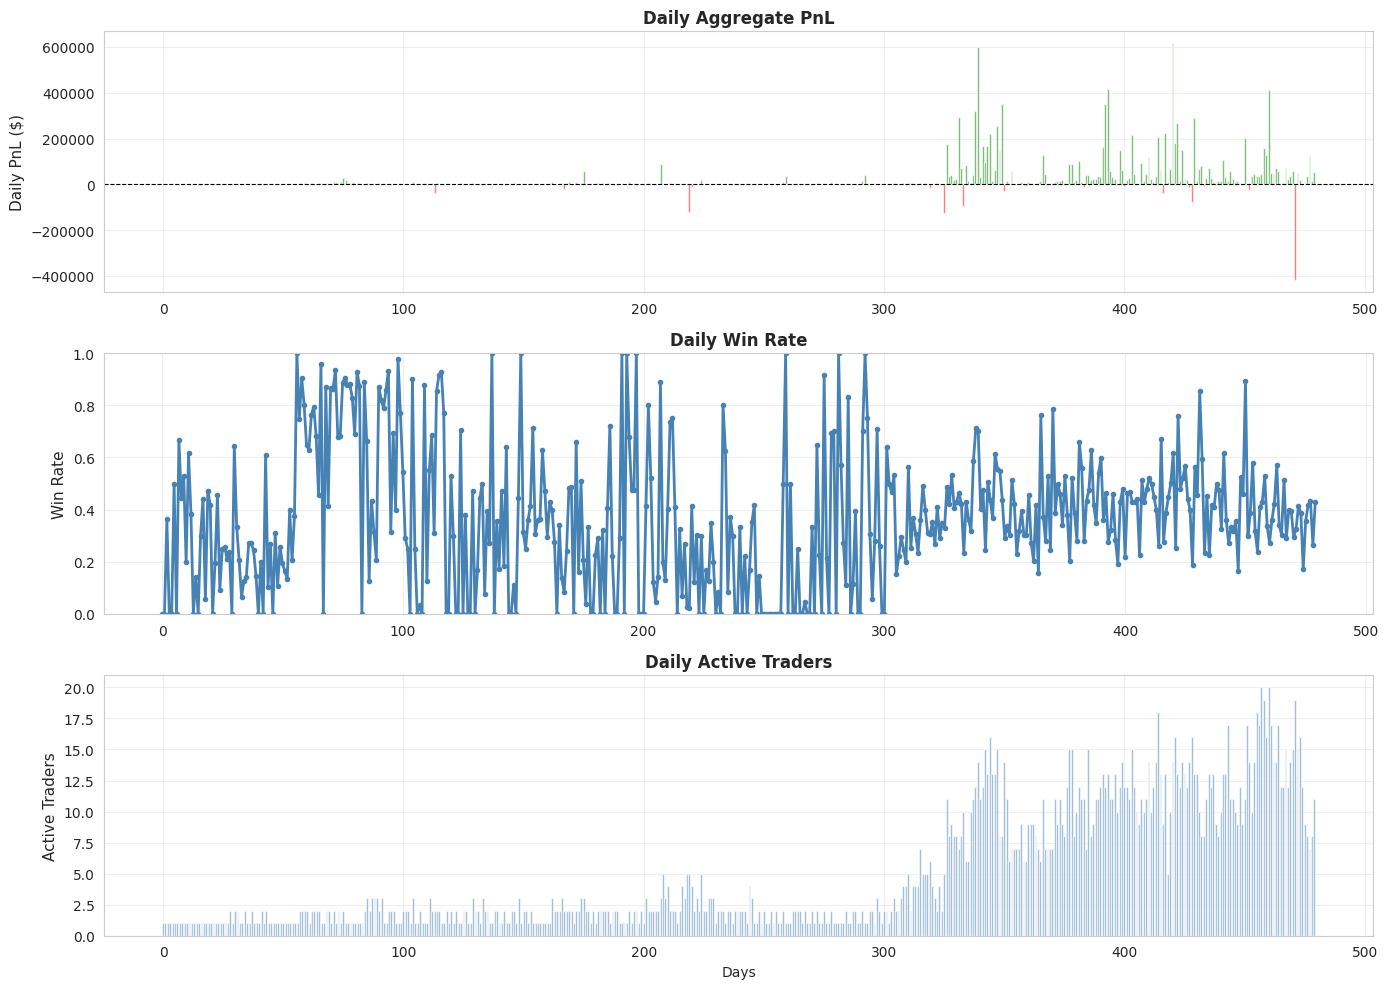

In [26]:
# Visualize
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Daily PnL
colors = ['green' if x > 0 else 'red' for x in daily_metrics['daily_total_pnl']]
axes[0].bar(range(len(daily_metrics)), daily_metrics['daily_total_pnl'], color=colors, alpha=0.7)
axes[0].set_ylabel('Daily PnL ($)', fontsize=11)
axes[0].set_title('Daily Aggregate PnL', fontsize=12, fontweight='bold')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[0].grid(True, alpha=0.3)

# Win Rate
axes[1].plot(range(len(daily_metrics)), daily_metrics['win_rate'],
             marker='o', linewidth=2, color='steelblue', markersize=3)
axes[1].set_ylabel('Win Rate', fontsize=11)
axes[1].set_title('Daily Win Rate', fontsize=12, fontweight='bold')
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3)

# Active Traders
axes[2].bar(range(len(daily_metrics)), daily_metrics['active_traders'],
           color='steelblue', alpha=0.7)
axes[2].set_ylabel('Active Traders', fontsize=11)
axes[2].set_xlabel('Days')
axes[2].set_title('Daily Active Traders', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/outputs/daily_metrics.png', dpi=300, bbox_inches='tight')
print("\n Saved: daily_metrics.png")
plt.show()

In [27]:
daily_metrics.to_csv('/content/needed/daily_metrics.csv', index=False)
print(" Saved: daily_metrics.csv")

 Saved: daily_metrics.csv


In [28]:
# Merge on date
merged_data = daily_metrics.merge(df_sentiment[['date', 'value', 'classification',
                                                   'sentiment_binary', 'is_greed']],
                                   on='date', how='inner')

print(f"\n Merge successful: {len(merged_data)} overlapping days")
print(f"Date range: {merged_data['date'].min()} to {merged_data['date'].max()}")



 Merge successful: 479 overlapping days
Date range: 2023-05-01 00:00:00 to 2025-05-01 00:00:00


In [29]:
# Sentiment segment comparison
fear_data = merged_data[merged_data['is_greed'] == 0]
greed_data = merged_data[merged_data['is_greed'] == 1]

In [30]:

print(f"\n FEAR PERIODS ({len(fear_data)} days):")
print(f"   Avg Daily PnL: ${fear_data['daily_total_pnl'].mean():.2f}")
print(f"   Avg Win Rate: {fear_data['win_rate'].mean():.2%}")
print(f"   Avg Trade Count: {fear_data['trade_count'].mean():.0f}")

print(f"\n GREED PERIODS ({len(greed_data)} days):")
print(f"   Avg Daily PnL: ${greed_data['daily_total_pnl'].mean():.2f}")
print(f"   Avg Win Rate: {greed_data['win_rate'].mean():.2%}")
print(f"   Avg Trade Count: {greed_data['trade_count'].mean():.0f}")



 FEAR PERIODS (172 days):
   Avg Daily PnL: $31332.48
   Avg Win Rate: 33.01%
   Avg Trade Count: 703

 GREED PERIODS (307 days):
   Avg Daily PnL: $15847.88
   Avg Win Rate: 38.48%
   Avg Trade Count: 294



 Saved: sentiment_trader_analysis.png


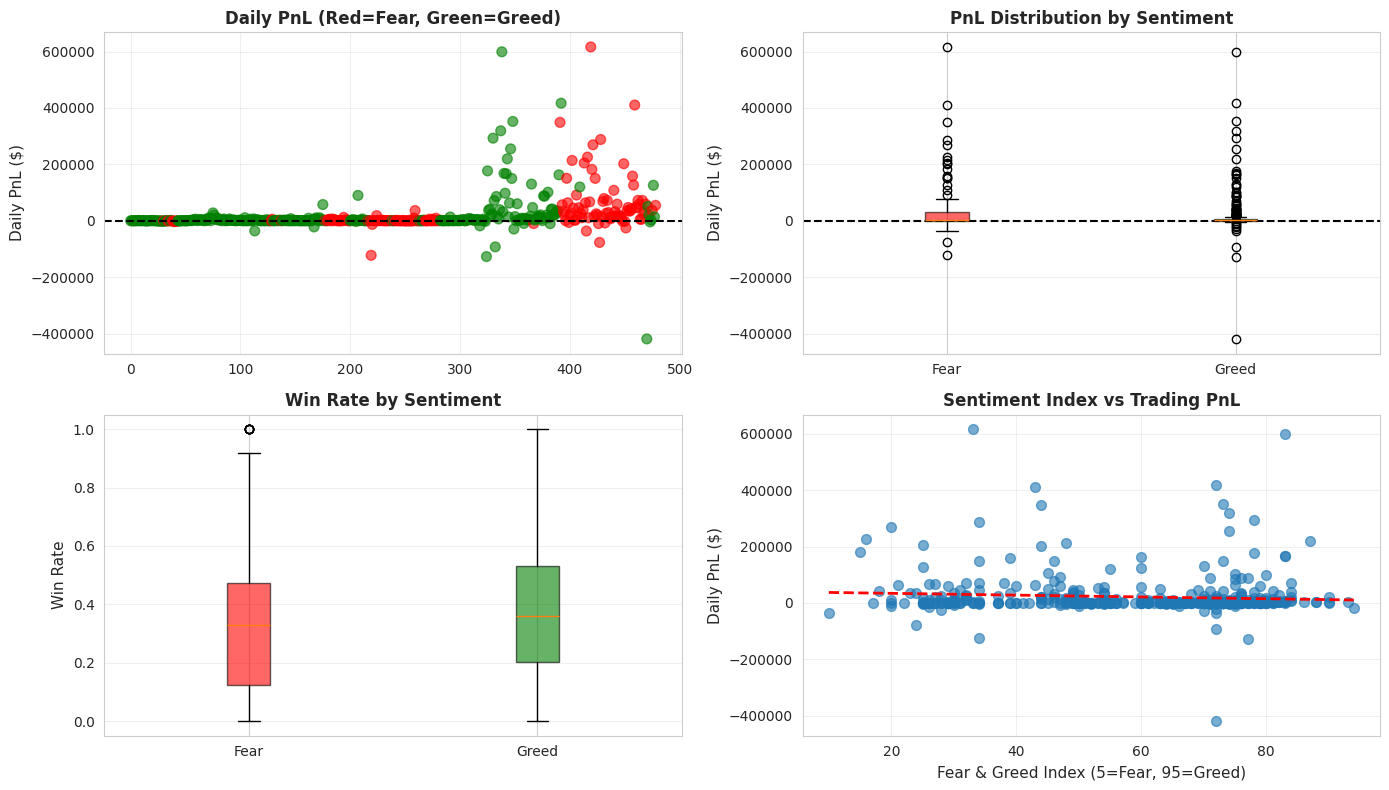

In [31]:

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Colored scatter: PnL by sentiment
colors_map = ['red' if x == 0 else 'green' for x in merged_data['is_greed']]
axes[0, 0].scatter(range(len(merged_data)), merged_data['daily_total_pnl'],
                  c=colors_map, s=50, alpha=0.6)
axes[0, 0].axhline(y=0, color='black', linestyle='--')
axes[0, 0].set_ylabel('Daily PnL ($)', fontsize=11)
axes[0, 0].set_title('Daily PnL (Red=Fear, Green=Greed)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Box plots: PnL
bp1 = axes[0, 1].boxplot([fear_data['daily_total_pnl'], greed_data['daily_total_pnl']],
                         labels=['Fear', 'Greed'], patch_artist=True)
for patch, color in zip(bp1['boxes'], ['red', 'green']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
axes[0, 1].set_ylabel('Daily PnL ($)', fontsize=11)
axes[0, 1].set_title('PnL Distribution by Sentiment', fontsize=12, fontweight='bold')
axes[0, 1].axhline(y=0, color='black', linestyle='--')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Box plots: Win Rate
bp2 = axes[1, 0].boxplot([fear_data['win_rate'], greed_data['win_rate']],
                         labels=['Fear', 'Greed'], patch_artist=True)
for patch, color in zip(bp2['boxes'], ['red', 'green']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
axes[1, 0].set_ylabel('Win Rate', fontsize=11)
axes[1, 0].set_title('Win Rate by Sentiment', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Sentiment Index vs PnL
axes[1, 1].scatter(merged_data['value'], merged_data['daily_total_pnl'], alpha=0.6, s=50)
z = np.polyfit(merged_data['value'], merged_data['daily_total_pnl'], 1)
p = np.poly1d(z)
axes[1, 1].plot(merged_data['value'].sort_values(), p(merged_data['value'].sort_values()),
               "r--", linewidth=2)
axes[1, 1].set_xlabel('Fear & Greed Index (5=Fear, 95=Greed)', fontsize=11)
axes[1, 1].set_ylabel('Daily PnL ($)', fontsize=11)
axes[1, 1].set_title('Sentiment Index vs Trading PnL', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/outputs/sentiment_trader_analysis.png', dpi=300, bbox_inches='tight')
print("\n Saved: sentiment_trader_analysis.png")
plt.show()


In [32]:

# T-test for PnL
t_stat_pnl, p_pnl = stats.ttest_ind(fear_data['daily_total_pnl'],
                                     greed_data['daily_total_pnl'])
print(f"\n PnL Difference (Fear vs Greed):")
print(f"   t-statistic: {t_stat_pnl:.4f}")
print(f"   p-value: {p_pnl:.4f}")
print(f"   Result: {' SIGNIFICANT' if p_pnl < 0.05 else ' Not significant'}")



 PnL Difference (Fear vs Greed):
   t-statistic: 2.2700
   p-value: 0.0237
   Result:  SIGNIFICANT


In [33]:
# T-test for Win Rate
t_stat_wr, p_wr = stats.ttest_ind(fear_data['win_rate'], greed_data['win_rate'])
print(f"\n Win Rate Difference (Fear vs Greed):")
print(f"   t-statistic: {t_stat_wr:.4f}")
print(f"   p-value: {p_wr:.4f}")
print(f"   Result: {' SIGNIFICANT' if p_wr < 0.05 else ' Not significant'}")



 Win Rate Difference (Fear vs Greed):
   t-statistic: -2.1997
   p-value: 0.0283
   Result:  SIGNIFICANT


In [34]:
# Correlation: Sentiment vs PnL
corr_sentiment_pnl = merged_data['value'].corr(merged_data['daily_total_pnl'])
print(f"\n Correlation (Sentiment Index vs Daily PnL):")
print(f"   Pearson r: {corr_sentiment_pnl:.4f}")
print(f"   Interpretation: {'Strong' if abs(corr_sentiment_pnl) > 0.7 else 'Moderate' if abs(corr_sentiment_pnl) > 0.3 else 'Weak'}")



 Correlation (Sentiment Index vs Daily PnL):
   Pearson r: -0.0826
   Interpretation: Weak


In [35]:
# Save merged data
merged_data.to_csv('/content/needed/merged_sentiment_trading.csv', index=False)
print("Saved: merged_sentiment_trading.csv")

Saved: merged_sentiment_trading.csv
